# 고급회귀분석 실습 CH03, CH04

SEOYEON CHOI  
2022-09-21

chapter 3, chapter 4

In [1]:
# setwd('C:/R-Project/DAT/Regression/')

In [2]:
library(ggplot2)

## Data

In [3]:
dt <- data.frame(x = c(4,8,9,8,8,12,6,10,6,9),
                 y = c(9,20,22,15,17,30,18,25,10,20))
dt

correlation check

In [4]:
cor(dt$x, dt$y)

0.921812343945765

산점도 확인

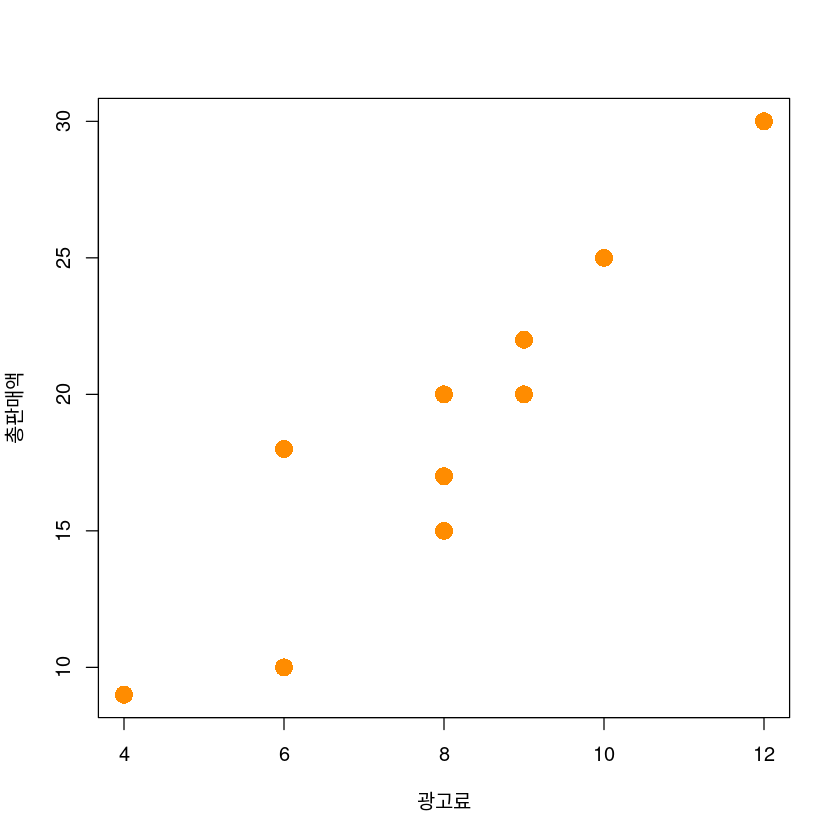

In [5]:
plot(y~x, 
     data = dt,
     xlab = "광고료",
     ylab = "총판매액",
     pch  = 16,
     cex  = 2,
     col  = "darkorange")

-   pch 점 모양

-   cex 점 크기

-   양의상관관계 강하네,

-   우상향이네, 단순상관선형 적용해보면 되겠다.

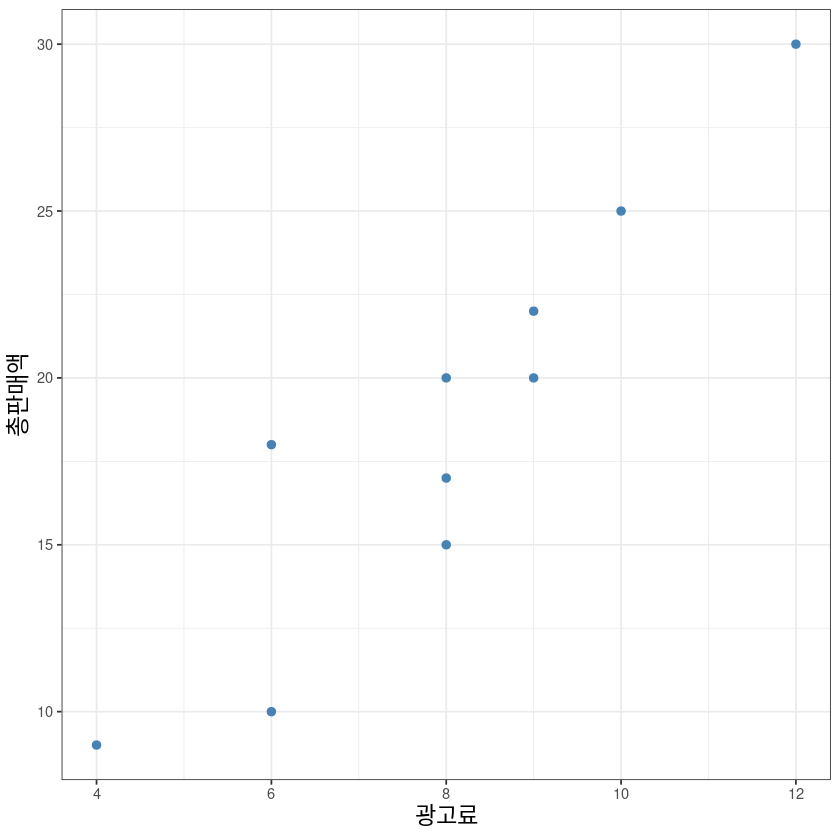

In [7]:
ggplot(dt, aes(x, y)) +
  geom_point(col='steelblue', lwd=2) +
  # geom_abline(intercept = co[1], slope = co[2], col='darkorange', lwd=1.2) +
  xlab("광고료")+ylab("총판매액")+
  # scale_x_continuous(breaks = seq(1,10))+
  theme_bw() +
  theme(axis.title = element_text(size = 14))

### 적합

$\hat{ y} = \widehat{(E(y|X=x))} = \hat{\beta_0} + \hat{\beta_1} * x$

$H_0$ : $\beta_0$ =0 vs $H_1$ : $\beta_0 \ne 0$

$H_0$ : $\beta_1 =0$ vs $H_1$ : $\beta_1 \ne 0$

모형 적합을 한다 yhat을 찾는다. - 회귀분석을 한다. 평균 반응을 추정한다.

lm linear model 사용

In [9]:
## y = beta0 + beta1*x + epsilon
model1 <- lm(y ~ x, dt)
# lm(y ~ 0 + x, dt) beta0 없이 분석하고 싶을때
model1


Call:
lm(formula = y ~ x, data = dt)

Coefficients:
(Intercept)            x  
     -2.270        2.609  

설명변수 x 하나일때

-   beta0hat = -2.270
-   beta1hat = 2.609

In [10]:
summary(model1) 


Call:
lm(formula = y ~ x, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-3.600 -1.502  0.813  1.128  4.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2696     3.2123  -0.707 0.499926    
x             2.6087     0.3878   6.726 0.000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.631 on 8 degrees of freedom
Multiple R-squared:  0.8497,    Adjusted R-squared:  0.831 
F-statistic: 45.24 on 1 and 8 DF,  p-value: 0.0001487

-   모형의 유의성 검정 자체(f검정)
-   개별 회귀계수에 대한 유의성검정(t검정)
-   beta1은 유의하지 않다
-   beta0는 유의하다
-   f통계량은 45.24(msr/mse) p값 충분히 작아서 모형은 유의하다.
-   y의 총 변동 중에 85%정도를 설명하고 있다.
-   root mse(RMSE) = 2.631

In [11]:
6.726**2

45.239076

단순선형에서만 해당

0.000149도 같음

In [12]:
names(model1)

'coefficients' 'residuals' 'effects' 'rank' 'fitted.values' 'assign' 'qr' 'df.residual' 'xlevels' 'call' 'terms' 'model'

In [13]:
model1$residuals # 보고 싶은 변수 입력해봐~

1 0.834782608695656 2 1.4 3 0.791304347826087 4 -3.6 5 -1.6 6 0.96521739130435 7 4.61739130434782 8 1.18260869565217 9 -3.38260869565218 10 -1.20869565217391

In [14]:
model1$fitted.values  ##hat y
model1$coefficients

1 8.16521739130434 2 18.6 3 21.2086956521739 4 18.6 5 18.6 6 29.0347826086957 7 13.3826086956522 8 23.8173913043478 9 13.3826086956522 10 21.2086956521739

(Intercept) -2.2695652173913 x 2.60869565217391

In [15]:
anova(model1)  ## 회귀모형의 유의성 검정

-   설명변수의 개수가 x 자유도
-   잔차의 자유도는 n-2

In [16]:
a <- summary(model1)
ls(a)

'adj.r.squared' 'aliased' 'call' 'coefficients' 'cov.unscaled' 'df' 'fstatistic' 'r.squared' 'residuals' 'sigma' 'terms'

In [17]:
summary(model1)$coef   ## 회귀계수의 유의성 검정

In [18]:
confint(model1, level = 0.95)  ##회귀계수의 신뢰구간
## beta +- t_alpha/2 (n-2) * se(beta)
qt(0.025, 8)
qt(0.975, 8)

-2.30600413520417

2.30600413520417

-   qt \_ tquantile

In [19]:
## y = beta1*x + epsilon
model2 <- lm(y ~ 0 + x, dt)
summary(model2)


Call:
lm(formula = y ~ 0 + x, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0641 -1.5882  0.2638  1.4818  3.9359 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   2.3440     0.0976   24.02  1.8e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.556 on 9 degrees of freedom
Multiple R-squared:  0.9846,    Adjusted R-squared:  0.9829 
F-statistic: 576.8 on 1 and 9 DF,  p-value: 1.798e-09

-   intercept 없는 모습
-   r squre가 두 번째가 높고,
-   p값도 훨씬 유의하게 나옴

In [20]:
anova(model1)

In [21]:
anova(model2)

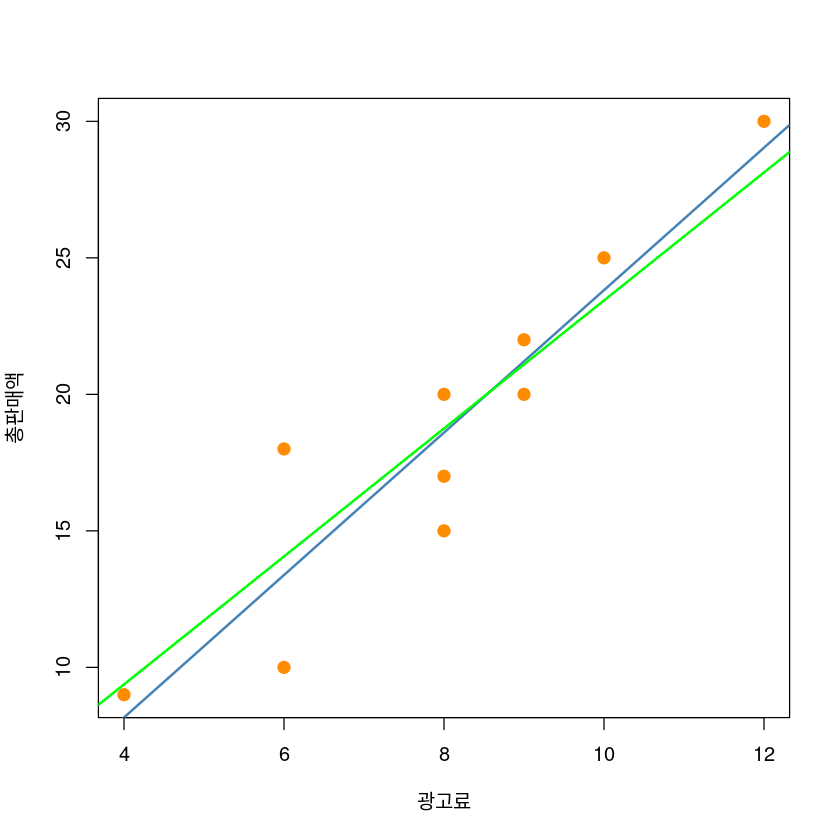

In [25]:
###########
plot(y~x, data = dt,
     xlab = "광고료",
     ylab = "총판매액",
     pch  = 20,
     cex  = 2,
     col  = "darkorange")
abline(model1, col='steelblue', lwd=2)
abline(model2, col='green', lwd=2)

model들이 기울기가 살짝씩 다르다

In [26]:
co <- coef(model1)

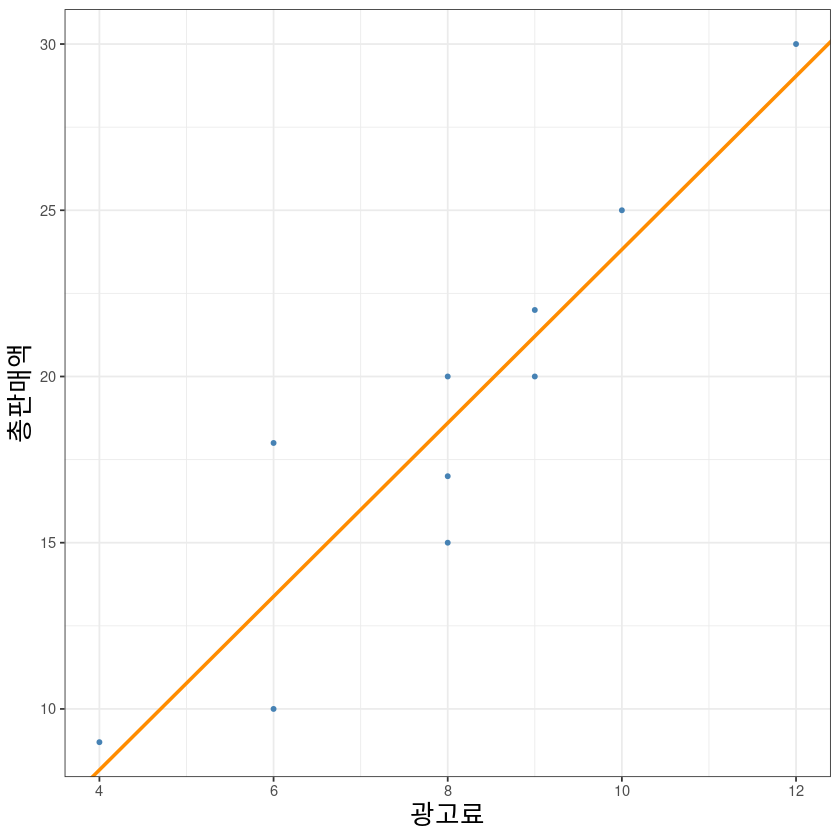

In [27]:
ggplot(dt, aes(x, y)) +
  geom_point(col='steelblue', lwd=1) +
  geom_abline(intercept = co[1], slope = co[2], col='darkorange', lwd=1) +
  xlab("광고료")+ylab("총판매액")+
  theme_bw()+
  theme(axis.title = element_text(size = 16))

In [28]:
######## LSE 구하기
# lm을 사용하지 않고 구할때

dt1 <- data.frame(
  i = 1:nrow(dt),
  x = dt$x,
  y = dt$y,
  x_barx = dt$x - mean(dt$x), # x - x평균
  y_bary = dt$y - mean(dt$y))  # y - y평균

In [29]:
dt1$x_barx2 <- dt1$x_barx^2 # x 편차의 제곱
dt1$y_bary2 <- dt1$y_bary^2 # y편차의 제곱
dt1$xy <-dt1$x_barx * dt1$y_bary

In [30]:
dt1

In [31]:
round(colSums(dt1),3)

i 55 x 80 y 186 x_barx 0 y_bary 0 x_barx2 46 y_bary2 368.4 xy 120

In [32]:
### hat beta1 = S_xy / S_xx
##hat beta0 = bar y - hat beta_1 * bar x
beta1 <- as.numeric(colSums(dt1)[8]/colSums(dt1)[6])
beta0 <- mean(dt$y) - beta1 *  mean(dt$x)

In [33]:
cat("hat beta0 = ", beta0)
cat("hat beta1 = ", beta1)

hat beta0 =  -2.269565hat beta1 =  2.608696

### 평균반응, 개별 y 추정

구분할 수 있어야 한다

신뢰구간 달라진다.

In [34]:
## E(Y|x0) 평균반응
## y = E(Y|x0) + epsilon 개별 y 추정
# x0 = 4.5
new_dt <- data.frame(x = 4.5)

In [35]:
# hat y0 = hat beta0 + hat beta1 * 4.5

predict(model1, 
        newdata = new_dt,
        interval = c("confidence"), level = 0.95)

new_data=new_df 정의 안 하면 fitted value가 나온다.

`confidence`는 평균반응

In [36]:
predict(model1, newdata = new_dt, 
        interval = c("prediction"), level = 0.95)

`prediction`은 개별 y 추정

신뢰구간이 커진다. $\to$ 표준오차가 달라지기 때문

In [37]:
dt_pred <- data.frame(
  x = 1:12,
  predict(model1, 
          newdata=data.frame(x=1:12), 
          interval="confidence", level = 0.95))
dt_pred

In [38]:
dt_pred2 <- as.data.frame(predict(model1, 
                                  newdata=data.frame(x=1:12), 
                                  interval="prediction", level = 0.95))
dt_pred2

In [39]:
names(dt_pred2)[2:3] <- c('plwr', 'pupr')

plot 같이 그리게 데이터 합치기

In [40]:
dt_pred3 <- cbind.data.frame(dt_pred, dt_pred2[,2:3])

In [41]:
barx <- mean(dt$x)
bary <- mean(dt$y)

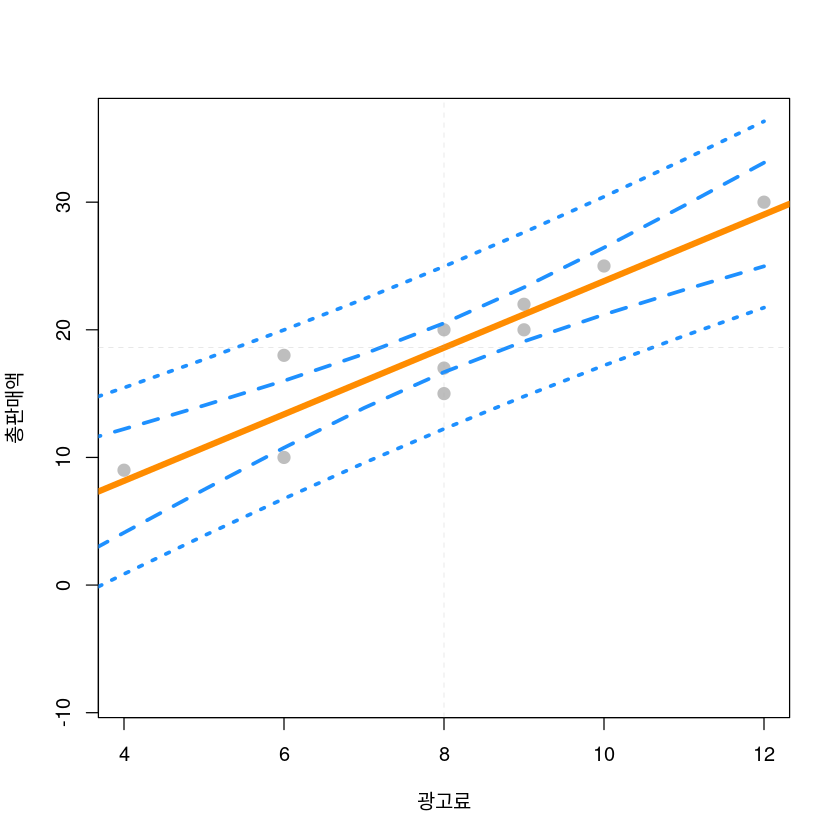

In [42]:
plot(y~x, data = dt,
     xlab = "광고료",
     ylab = "총판매액",
     pch  = 20,
     cex  = 2,
     col  = "grey",
     ylim = c(min(dt_pred3$plwr), max(dt_pred3$pupr)))
abline(model1, lwd = 5, col = "darkorange")
lines(dt_pred3$x, dt_pred3$lwr, col = "dodgerblue", lwd = 3, lty = 2)
lines(dt_pred3$x, dt_pred3$upr, col = "dodgerblue", lwd = 3, lty = 2)
lines(dt_pred3$x, dt_pred3$plwr, col = "dodgerblue", lwd = 3, lty = 3)
lines(dt_pred3$x, dt_pred3$pupr, col = "dodgerblue", lwd = 3, lty = 3)

abline(h=bary,v=barx, lty=2, lwd=0.2, col='dark grey')

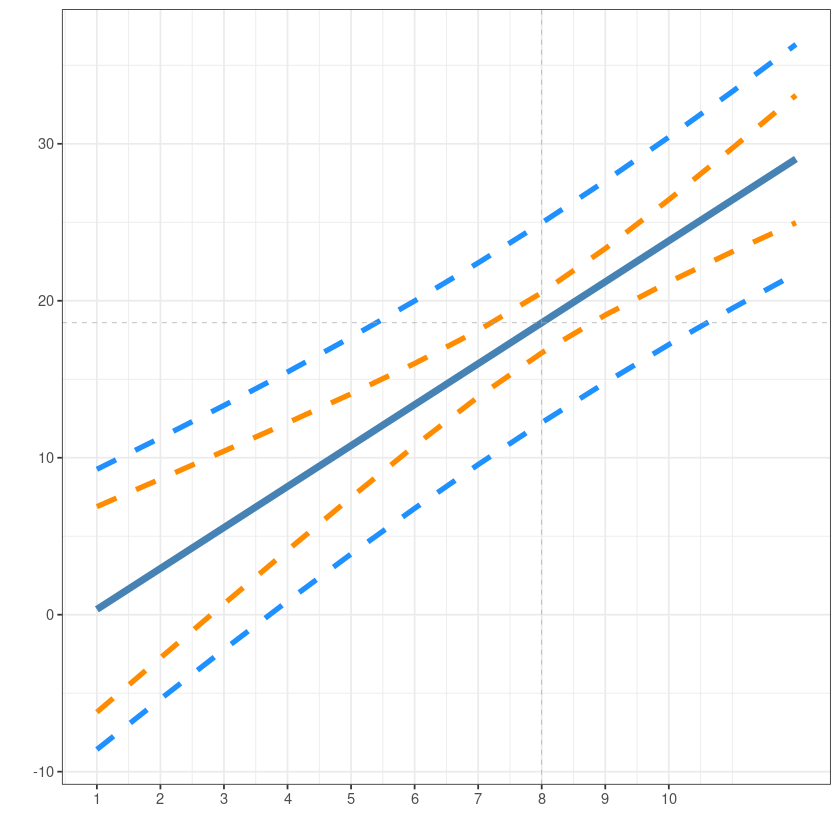

In [43]:
ggplot(dt_pred3, aes(x, fit)) +
  geom_line(col='steelblue', lwd=2) +
  xlab("")+ylab("")+
  scale_x_continuous(breaks = seq(1,10))+
  geom_line(aes(x, lwr), lty=2, lwd=1.5, col='darkorange') +
  geom_line(aes(x, upr), lty=2, lwd=1.5, col='darkorange') +
  geom_line(aes(x, plwr), lty=2, lwd=1.5, col='dodgerblue') +
  geom_line(aes(x, pupr), lty=2, lwd=1.5, col='dodgerblue') +
  geom_vline(xintercept = barx, lty=2, lwd=0.2, col='dark grey')+
  geom_hline(yintercept = bary, lty=2, lwd=0.2, col='dark grey')+
  theme_bw()

In [44]:
bb <- summary(model1)$sigma * ( 1 + 1/10 +(dt$x - 8)^2/46)
dt$ma95y <- model1$fitted + 2.306*bb
dt$mi95y <- model1$fitted - 2.306*bb

`geom_smooth()` using formula 'y ~ x'


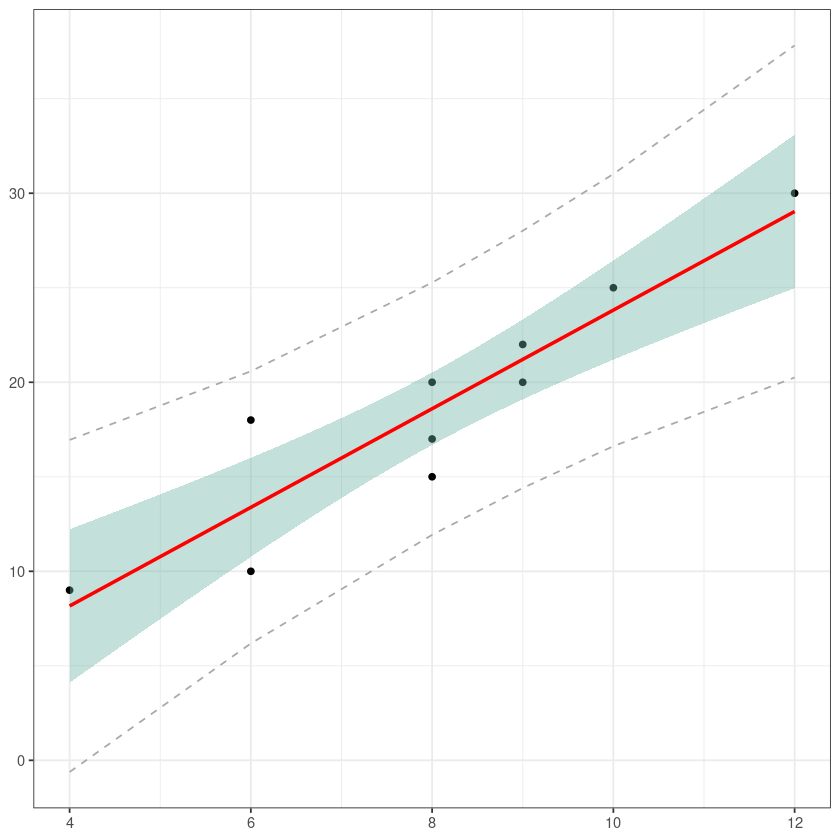

In [45]:
ggplot(dt, aes(x=x, y=y)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  geom_line(aes(x, mi95y), col = 'darkgrey', lty=2) +
  geom_line(aes(x, ma95y), col = 'darkgrey', lty=2) +
  theme_bw() +
  theme(axis.title = element_blank())

### 잔차분석

In [46]:
### epsilon : 선형성, 등분산성, 정규성, 독립성

In [47]:
dt
dt$yhat <- model1$fitted
# fitted.values(model1) # y에 대한 추정값 구하기
dt$resid <- model1$residuals
# resid(model1)

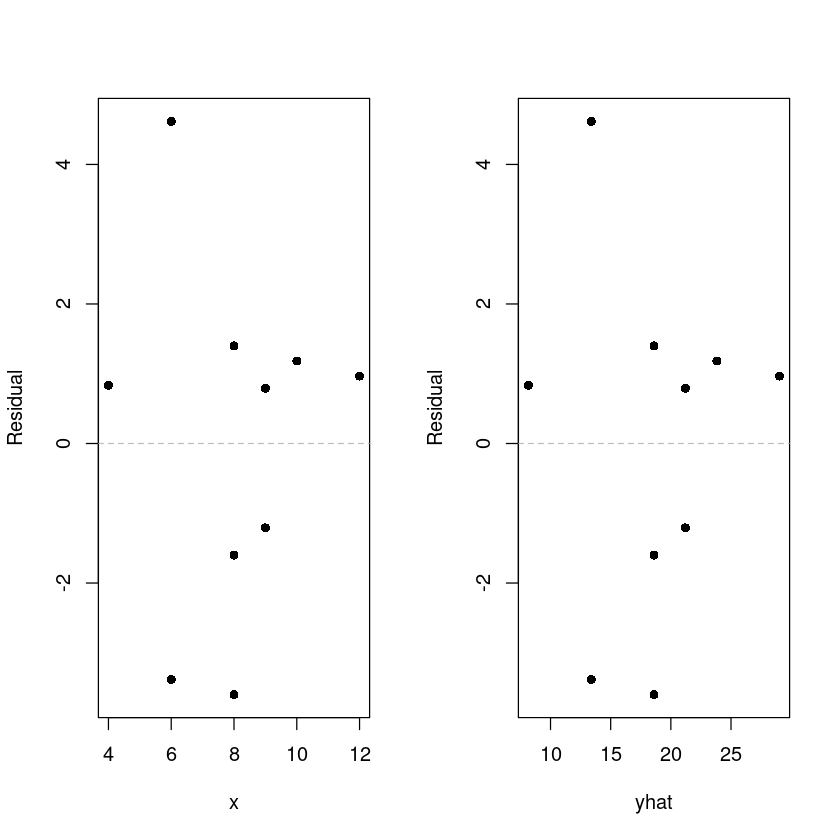

In [48]:
par(mfrow=c(1,2))
plot(resid ~ x, dt, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
plot(resid ~ yhat, dt, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
par(mfrow=c(1,1))

단순선형에서는 두 plot의 차이가 없다.

-   선형성 만족
-   등분산성 나름 만족
-   정규성 아웃라이어 있는 거 같은데..
-   독립성?

In [49]:
# 독립성검정 : DW test
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [50]:
## 
dwtest(model1, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0
# dwtest(model1, alternative = "greater")  #H0 : uncorrelated vs H1 : rho > 0
# dwtest(model1, alternative = "less")  #H0 : uncorrelated vs H1 : rho < 0


    Durbin-Watson test

data:  model1
DW = 1.4679, p-value = 0.3916
alternative hypothesis: true autocorrelation is not 0

p 값 커서 기각할 수 없다.

첫 번째꺼 주로 보기

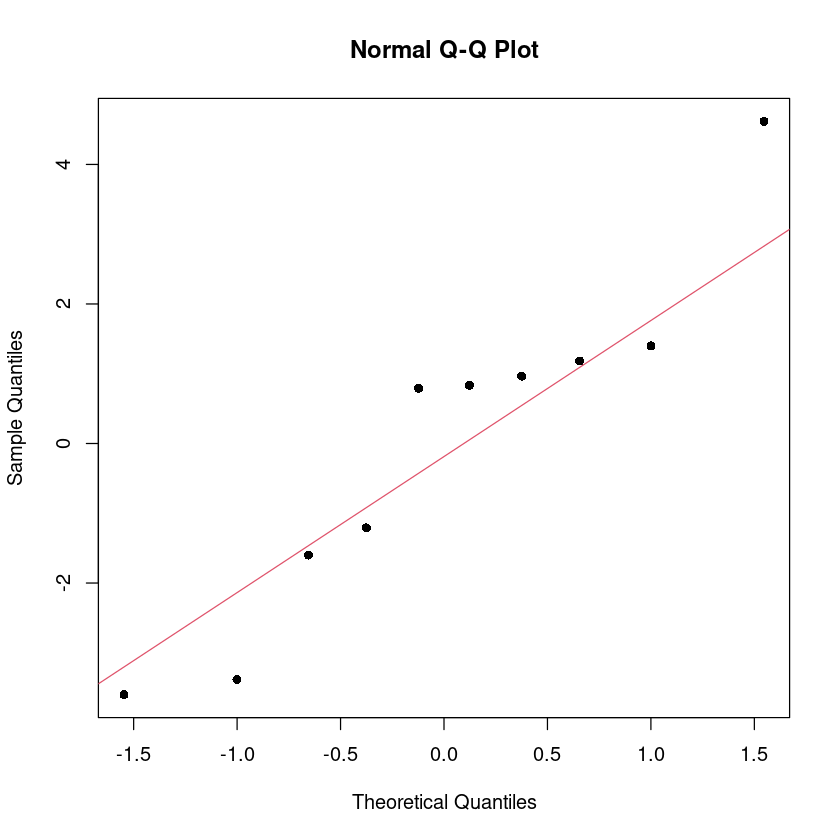

In [51]:
## 정규분포 (QQ plot)
qqnorm(dt$resid, pch=16)
qqline(dt$resid, col = 2)

분위수분위수 그림 - 정규분포의 실제 - 어떤 분포의 이론적 분위수와 내가
가진 sample의 분위수 비교

주로 꼬리쪽을 많이 본다. - 이 데이터의 경우 꼬리부분이 차이가 커 보임

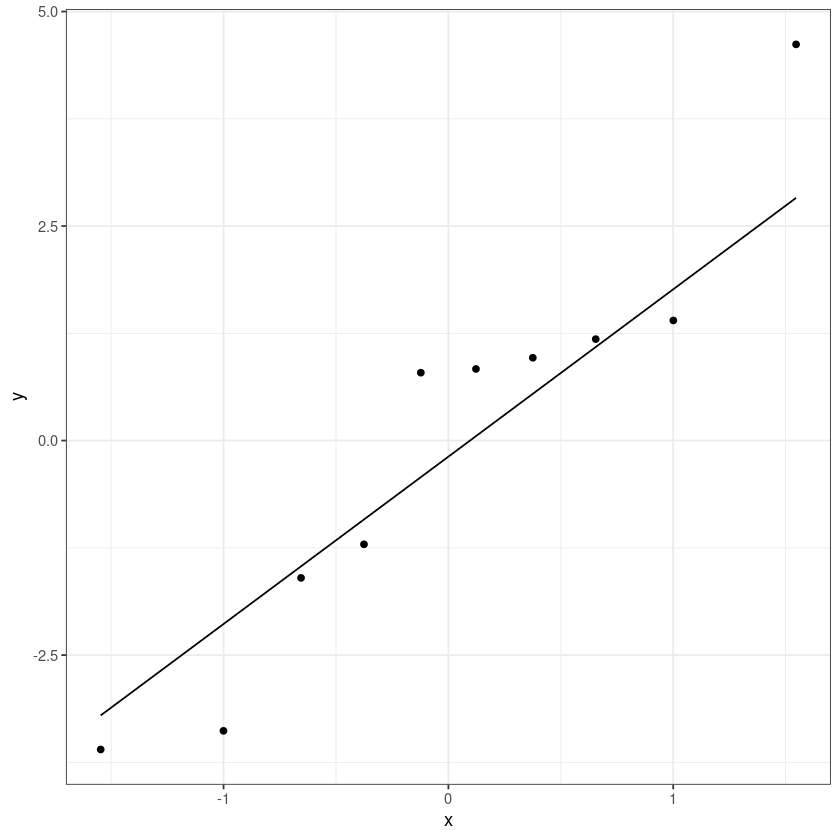

In [52]:
ggplot(dt, aes(sample = resid)) + 
  stat_qq() + stat_qq_line() +
  theme_bw()

In [53]:
## 정규분포 검정 
shapiro.test(dt$resid)  ##shapiro-wilk test
#H0 : normal distributed vs H1 : not


    Shapiro-Wilk normality test

data:  dt$resid
W = 0.92426, p-value = 0.3939

p값 작게 나오면 정규분포라고 하기 어렵다.

-   정규성은 잔차를 넣어줬는데
-   bptest는 model을 넣었다.

In [54]:
## 등분산성 검정 
bptest(model1) #Breusch–Pagan test
# H0 : 등분산 vs H1 : 이분산 


    studentized Breusch-Pagan test

data:  model1
BP = 1.6727, df = 1, p-value = 0.1959

### 책 예제

In [55]:
# install.packages('UsingR')
library(UsingR)

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘UsingR’


The following object is masked from ‘package:survival’:

    cancer



In [56]:
data(father.son)

In [57]:
names(father.son)

'fheight' 'sheight'

In [58]:
lm.fit<-lm(sheight~fheight, data=father.son)

In [59]:
summary(lm.fit)


Call:
lm(formula = sheight ~ fheight, data = father.son)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8772 -1.5144 -0.0079  1.6285  8.9685 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.88660    1.83235   18.49   <2e-16 ***
fheight      0.51409    0.02705   19.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.437 on 1076 degrees of freedom
Multiple R-squared:  0.2513,    Adjusted R-squared:  0.2506 
F-statistic: 361.2 on 1 and 1076 DF,  p-value: < 2.2e-16

아버지의 키가 아들의 키의 25%만 설명

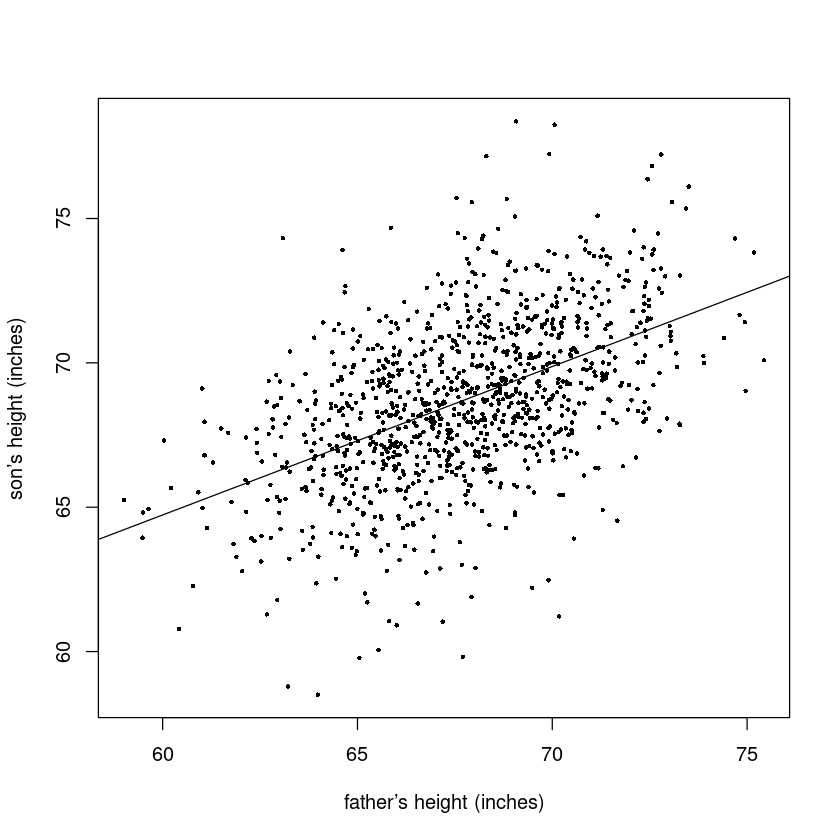

In [60]:
plot(sheight~fheight, 
     data=father.son, 
     pch=16, cex=0.5,
     xlab="father’s height (inches)", 
     ylab="son’s height (inches)")
abline(lm.fit)


Call:
lm(formula = High ~ Year, data = amazon)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3629 -0.5341  0.1479  0.4903  1.1412 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -330.21235   78.03319  -4.232 0.000725 ***
Year           0.18088    0.03961   4.567 0.000371 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8001 on 15 degrees of freedom
Multiple R-squared:  0.5816,    Adjusted R-squared:  0.5537 
F-statistic: 20.85 on 1 and 15 DF,  p-value: 0.0003708

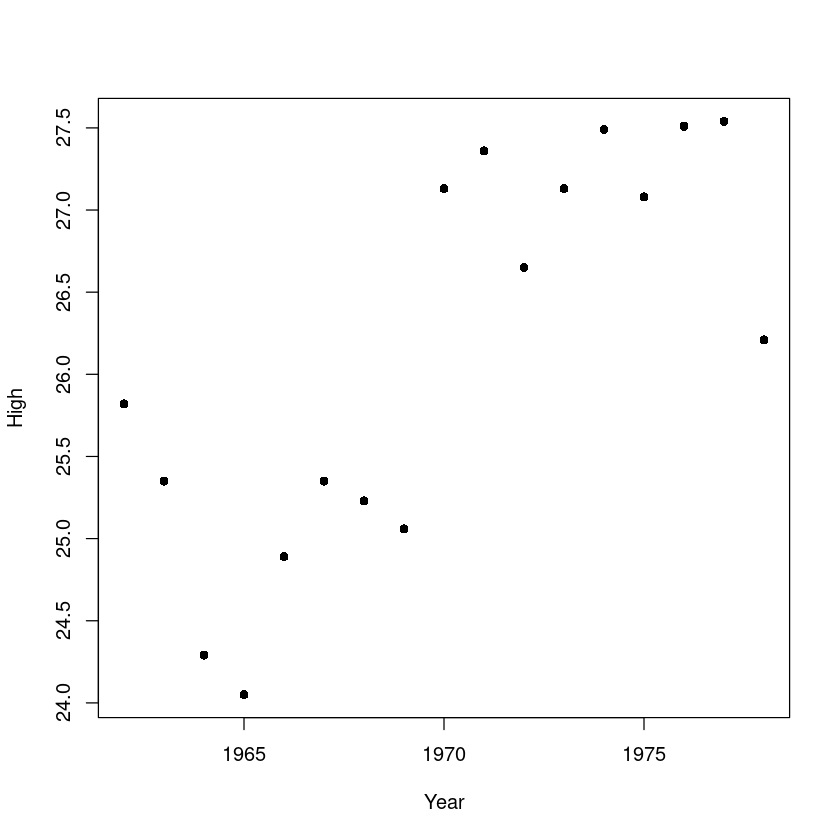


    Durbin-Watson test

data:  lm.fit
DW = 1.0487, p-value = 0.006864
alternative hypothesis: true autocorrelation is greater than 0

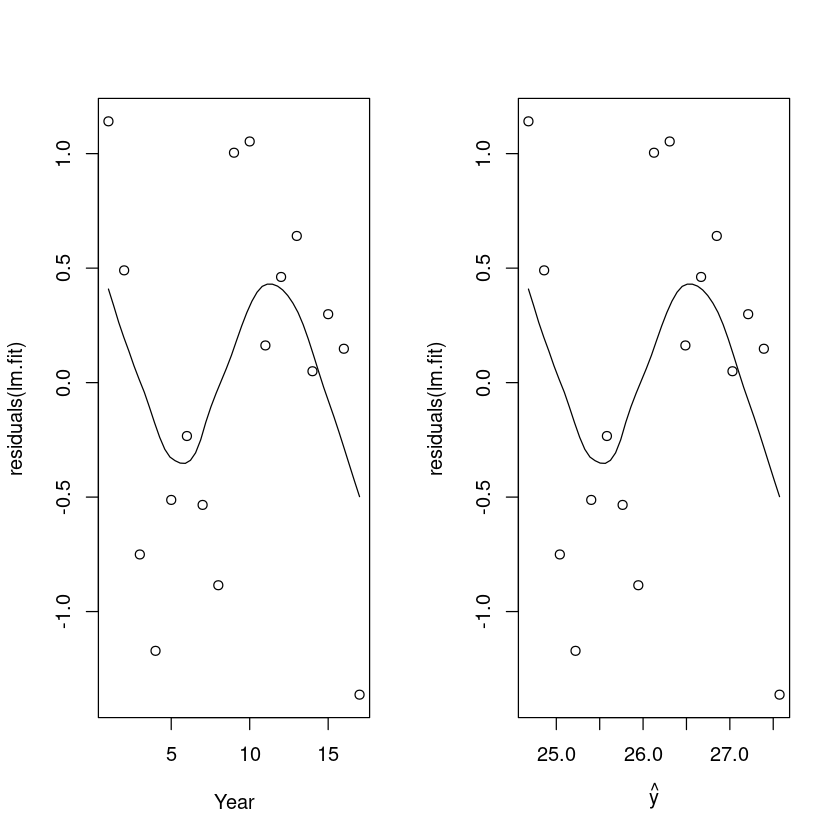

In [61]:

amazon<-read.csv("amazon.csv")
plot(High   ~Year  , amazon, pch=16)

lm.fit<-lm(High~Year, data=amazon)
summary(lm.fit)

confint(lm.fit)

par(mfrow=c(1,2))
scatter.smooth(x=1:length(amazon$Year), y=residuals(lm.fit), xlab="Year")
scatter.smooth(x=predict(lm.fit), y=residuals(lm.fit), xlab=expression(hat(y)))

library(lmtest)
dwtest(lm.fit)


양의 상관관계가 있다. - 시간순 index - 최근 관측 데이터에 영향 많이 받는
편